Link: https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [9]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, array_to_img, load_img

In [11]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('/content/cat-10-e1573844975155.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/preview', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

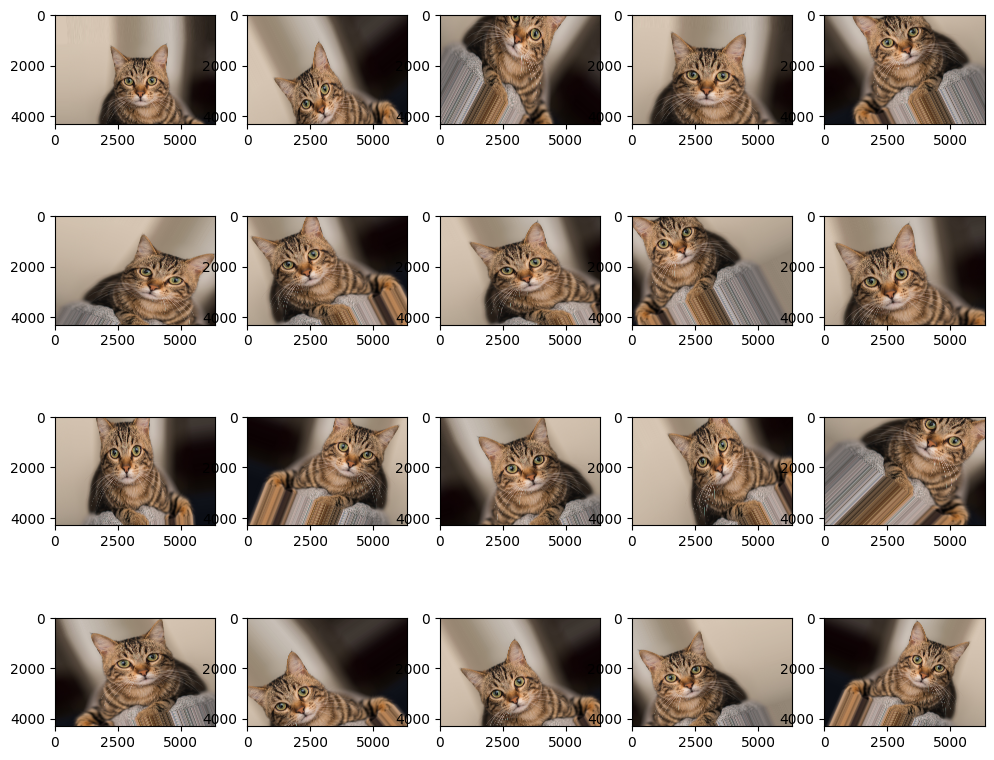

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 5, figsize=(12, 10))  # Create a 4x5 grid to display 20 images
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir='/content/preview', save_prefix='cat', save_format='jpeg'):
    # Convert the batch image to a 3D array (150, 150, 3)
    image = batch[0].astype('uint8')
    ax[i // 5, i % 5].imshow(image)  # Show the image in the grid
    i += 1
    if i >= 20:
        break  # Display 20 augmented images
plt.show()